In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing, cluster
import seaborn as sns; sns.set()
import csv
import scipy
## for deep learning
import minisom

In [9]:
df = pd.read_excel('weighted clustering.xlsx')
df = df.drop(['Unnamed: 0'], axis=1)

In [10]:
df.head()

,Province,City,Subdistrict,Urban Village,Latitude,Longitude,Sum of Weight,Region
0,Jawa Barat,Bekasi,Tambun Selatan,Mustika Jaya,-6.281744,107.044666,1443275,"Mustika Jaya, Tambun Selatan, Bekasi, Jawa Barat"
1,Jawa Barat,Bekasi,Setu,Cijengkol,-6.322445,107.038546,542007,"Cijengkol, Setu, Bekasi, Jawa Barat"
2,Jawa Barat,Bekasi,Setu,Cikarageman,-6.385432,107.017257,620513,"Cikarageman, Setu, Bekasi, Jawa Barat"
3,Jawa Barat,Bekasi,Setu,Cijengkol,-6.328411,107.033673,1914914,"Cijengkol, Setu, Bekasi, Jawa Barat"
4,Jawa Barat,Bekasi,Setu,Burangkeng,-6.341191,107.027638,1875744,"Burangkeng, Setu, Bekasi, Jawa Barat"


C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


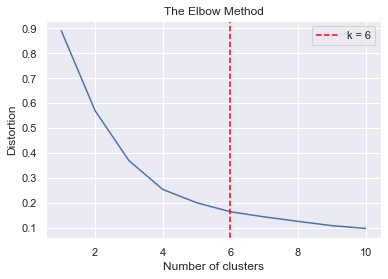

In [11]:
# Elbow Method for Unweighted Clustering
X=df[["Latitude","Longitude"]]
max_k = 10
## iterations
distortions = [] 
for i in range(1, max_k+1):
    if len(X) >= i:
       model = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
       model.fit(X)
       distortions.append(model.inertia_)
## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i 
     in np.diff(distortions,2)]))
## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters', 
       ylabel="Distortion")
ax.legend()
ax.grid(True)
plt.show()

In [15]:
#Clustering for Unweighted 
kmeansu = KMeans(n_clusters = 6, init ='k-means++')
df_X= X.copy()
df_X["cluster"]= kmeansu.fit_predict(X)
#find real centroids
closest, distances = scipy.cluster.vq.vq(kmeansu.cluster_centers_,
                                         df_X.drop("cluster", axis=1).values)
df_X["centers"]=0
for i in closest:
    df_X["centers"].iloc[i]=1
    
#menambahakan kolom untuk cluster dan centers untuk unweighted clustering
df[["cluster","centers"]] = df_X[["cluster","centers"]]
df.head()

C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Province,City,Subdistrict,Urban Village,Latitude,Longitude,Sum of Weight,Region,cluster,centers
0,Jawa Barat,Bekasi,Tambun Selatan,Mustika Jaya,-6.281744,107.044666,1443275,"Mustika Jaya, Tambun Selatan, Bekasi, Jawa Barat",1,0
1,Jawa Barat,Bekasi,Setu,Cijengkol,-6.322445,107.038546,542007,"Cijengkol, Setu, Bekasi, Jawa Barat",5,0
2,Jawa Barat,Bekasi,Setu,Cikarageman,-6.385432,107.017257,620513,"Cikarageman, Setu, Bekasi, Jawa Barat",5,0
3,Jawa Barat,Bekasi,Setu,Cijengkol,-6.328411,107.033673,1914914,"Cijengkol, Setu, Bekasi, Jawa Barat",5,0
4,Jawa Barat,Bekasi,Setu,Burangkeng,-6.341191,107.027638,1875744,"Burangkeng, Setu, Bekasi, Jawa Barat",5,0


Text(0.5, 1.0, 'Clustering GPS Co-ordinates to Form Regions - Unweighted')

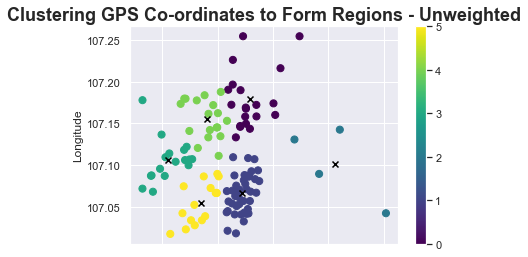

In [16]:
#mevisualisasikan hasil cluster di scatter
centers = kmeansu.cluster_centers_ # Coordinates of cluster centers.
labels = kmeansu.predict(X) # Labels of each point
#Visualise Resutls
X.plot.scatter(x = 'Latitude', y = 'Longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker="x")
plt.title('Clustering GPS Co-ordinates to Form Regions - Unweighted',fontsize=18, fontweight='bold')

In [17]:
## for geospatial
import folium
import geopy
import scipy
## for deep learning
import minisom

In [18]:
#Let’s visualize those pieces of information on a map. 
#First of all, I need to get the coordinates of the geographic area to start up the map. 
#I shall do that with geopy:

province = "Jawa Barat"
## get location
locator = geopy.geocoders.Nominatim(user_agent="MyCoder")
location = locator.geocode(province)
print(location)
## keep latitude and longitude only
location = [location.latitude, location.longitude]
print("[lat, long]:", location)

Jawa Barat, Indonesia
[lat, long]: [-6.8891904, 107.6404716]


In [20]:
#Mevisualisasikan pada peta-> follium
x, y = "Latitude", "Longitude"
color = "cluster"
size = "Sum of Weight"
popup = ["Region", "Sum of Weight"]
marker = "centers"
data = df.copy()
## create color column
lst_elements = sorted(list(df[color].unique()))
lst_colors = ['#%06X' % np.random.randint(0, 0xFFFFFF) for i in 
              range(len(lst_elements))]
data["color"] = data[color].apply(lambda x: 
                lst_colors[lst_elements.index(x)])
## create size column (scaled)
scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(
               data[size].values.reshape(-1,1)).reshape(-1)
## initialize the map with the starting location
map_ = folium.Map(location=location, tiles="cartodbpositron",
                  zoom_start=11)
## add points
data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]], popup=row[popup],
           color=row["color"], fill=True,
           radius=row["size"]).add_to(map_), axis=1)
## add html legend
legend_html = """<div style="position:fixed; bottom:10px; left:10px; border:2px solid black; z-index:9999; font-size:14px;">&nbsp;<b>"""+color+""":</b><br>"""
for i in lst_elements:
     legend_html = legend_html+"""&nbsp;<i class="fa fa-circle 
     fa-1x" style="color:"""+lst_colors[lst_elements.index(i)]+"""">
     </i>&nbsp;"""+str(i)+"""<br>"""
legend_html = legend_html+"""</div>"""
map_.get_root().html.add_child(folium.Element(legend_html))
## add centroids marker
lst_elements = sorted(list(df[marker].unique()))
data[data[marker]==1].apply(lambda row: 
           folium.Marker(location=[row[x],row[y]], 
           popup=row[marker], draggable=False,          
           icon=folium.Icon(color="black")).add_to(map_), axis=1)
## plot the map
map_

In [122]:
#####WEIGHTED KMEANS#####
data= df.copy()
data.head()

,Province,City,Subdistrict,Urban Village,Latitude,Longitude,Sum of Weight,Region,cluster,centers
0,Jawa Barat,Bekasi,Tambun Selatan,Mustika Jaya,-6.281744,107.044666,1443275,"Mustika Jaya, Tambun Selatan, Bekasi, Jawa Barat",1,0
1,Jawa Barat,Bekasi,Setu,Cijengkol,-6.322445,107.038546,542007,"Cijengkol, Setu, Bekasi, Jawa Barat",5,0
2,Jawa Barat,Bekasi,Setu,Cikarageman,-6.385432,107.017257,620513,"Cikarageman, Setu, Bekasi, Jawa Barat",5,0
3,Jawa Barat,Bekasi,Setu,Cijengkol,-6.328411,107.033673,1914914,"Cijengkol, Setu, Bekasi, Jawa Barat",5,0
4,Jawa Barat,Bekasi,Setu,Burangkeng,-6.341191,107.027638,1875744,"Burangkeng, Setu, Bekasi, Jawa Barat",5,0


In [123]:
dfw= data.drop(["cluster","centers"], axis=1) 
dfw.head()

,Province,City,Subdistrict,Urban Village,Latitude,Longitude,Sum of Weight,Region
0,Jawa Barat,Bekasi,Tambun Selatan,Mustika Jaya,-6.281744,107.044666,1443275,"Mustika Jaya, Tambun Selatan, Bekasi, Jawa Barat"
1,Jawa Barat,Bekasi,Setu,Cijengkol,-6.322445,107.038546,542007,"Cijengkol, Setu, Bekasi, Jawa Barat"
2,Jawa Barat,Bekasi,Setu,Cikarageman,-6.385432,107.017257,620513,"Cikarageman, Setu, Bekasi, Jawa Barat"
3,Jawa Barat,Bekasi,Setu,Cijengkol,-6.328411,107.033673,1914914,"Cijengkol, Setu, Bekasi, Jawa Barat"
4,Jawa Barat,Bekasi,Setu,Burangkeng,-6.341191,107.027638,1875744,"Burangkeng, Setu, Bekasi, Jawa Barat"


In [144]:
#table weight
Xw= df[["Latitude", "Longitude","Sum of Weight"]]
Xw.head()

,Latitude,Longitude,Sum of Weight
0,-6.281744,107.044666,1443275
1,-6.322445,107.038546,542007
2,-6.385432,107.017257,620513
3,-6.328411,107.033673,1914914
4,-6.341191,107.027638,1875744


In [145]:
Xw[Xw.columns[0:2]]

,Latitude,Longitude
0,-6.281744,107.044666
1,-6.322445,107.038546
2,-6.385432,107.017257
3,-6.328411,107.033673
4,-6.341191,107.027638
...,...,...
112,-6.186534,107.216403
113,-6.196042,107.160268
114,-6.152145,107.254818
115,-6.079462,107.142544


In [146]:
Xw[Xw.columns[2]]

0      1443275
1       542007
2       620513
3      1914914
4      1875744
        ...   
112     502224
113     903048
114    1047397
115     809435
116    1345391
Name: Sum of Weight, Length: 117, dtype: int64

In [127]:
# Elbow Method for Weighted Clustering
K_clusters= range(1,100)
kmeansw= [KMeans(n_clusters=i) for i in K_clusters]

lat_long= Xw[Xw.columns[0:2]]
weight= Xw[Xw.columns[2]]
sample_weight= weight
score = [kmeansw[i].fit(lat_long, sample_weight = weight).score(lat_long) for i in range(len(kmeansw))]

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


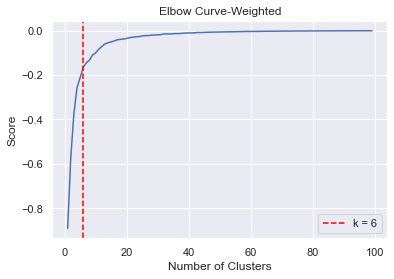

In [128]:
#visualisasi elbow method
fig, ax= plt.subplots()
ax.plot(K_clusters, score)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='Elbow Curve-Weighted', xlabel='Number of Clusters', ylabel='Score')
ax.legend()
ax.grid(True)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


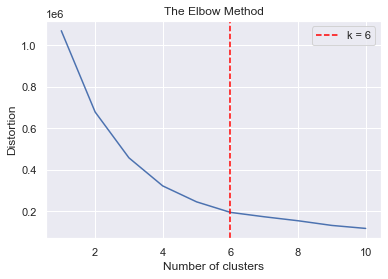

In [149]:
# Elbow Method for Unweighted Clustering
latlong= Xw[["Latitude", "Longitude"]]
W= Xw[Xw.columns[2]]
max_k = 10
## iterations
distortions = [] 
for i in range(1, max_k+1):
    if len(latlong) >= i:
       model = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=400, n_init=10, random_state=0)
       model.fit(latlong,sample_weight = W)
       distortions.append(model.inertia_)
## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i 
     in np.diff(distortions,2)]))
## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters', 
       ylabel="Distortion")
ax.legend()
ax.grid(True)
plt.show()

In [52]:
#Clustering weighted
kmeansw = KMeans(n_clusters = 6, init ='k-means++')
dfXw= Xw.copy()
lat_long= dfXw[dfXw.columns[0:2]]
sow= dfXw[dfXw.columns[2]]
#weighted_kmeans_clusters= kmeansw.fit(lat_long, sample_weight= sow)
dfXw['cluster_labelw'] = kmeansw.fit_predict(lat_long, sample_weight= sow)

#centroid = kmeans.cluster_centers_ # Coordinates of cluster centers.

#labels = dfX_w['cluster_label'] # Labels of each point
#find real centroids
closest, distances = scipy.cluster.vq.vq(centers,
                                         dfXw.drop("cluster_labelw", axis=1).values)
dfXw["centersw"]=0
for i in closest:
   dfXw["centersw"].iloc[i]=1
#menambahkan data cluster label weight dan center
dfw[["cluster_labelw","centersw"]] = dfX_w[["cluster_labelw","centersw"]]
dfw.head()


ValueError: obs and code should have same number of features (columns)

Text(0.5, 1.0, 'Clustering GPS Co-ordinates to Form Regions - Weighted')

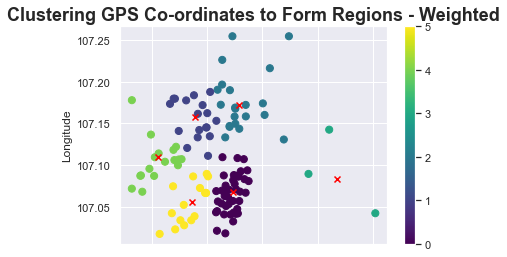

In [151]:
#Clustering weighted
kmeansw1 = KMeans(n_clusters = 6, init ='k-means++',random_state=0)
weighted_kmeans_clusters= kmeansw1.fit(latlong, sample_weight= W)
dfXw['cluster_labelw'] = kmeansw1.predict(latlong, sample_weight= W)
centroid = kmeansw1.cluster_centers_ # Coordinates of cluster centers.
labels = dfXw['cluster_labelw'] # Labels of each point

#visualisasi
dfXw.plot.scatter(x = 'Latitude', y = 'Longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centroid[:, 0], centroid[:, 1], c='red', marker='x')
plt.title('Clustering GPS Co-ordinates to Form Regions - Weighted',fontsize=18, fontweight='bold')

In [152]:
Xw

,Latitude,Longitude,Sum of Weight
0,-6.281744,107.044666,1443275
1,-6.322445,107.038546,542007
2,-6.385432,107.017257,620513
3,-6.328411,107.033673,1914914
4,-6.341191,107.027638,1875744
...,...,...,...
112,-6.186534,107.216403,502224
113,-6.196042,107.160268,903048
114,-6.152145,107.254818,1047397
115,-6.079462,107.142544,809435


In [139]:
W

0      1443275
1       542007
2       620513
3      1914914
4      1875744
        ...   
112     502224
113     903048
114    1047397
115     809435
116    1345391
Name: Sum of Weight, Length: 117, dtype: int64

In [153]:
#epicentrum weighted
centroid

array([[ -6.25385892, 107.06803567],
       [ -6.32131707, 107.15739715],
       [ -6.24188034, 107.17242135],
       [ -6.06495975, 107.08384754],
       [ -6.38848651, 107.11005344],
       [ -6.32744617, 107.05566316]])

In [82]:
#epicentrum unweighted
centers

array([[ -6.24159769, 107.17909821],
       [ -6.25557788, 107.06614266],
       [ -6.08846075, 107.10119633],
       [ -6.3887924 , 107.10580558],
       [ -6.31997977, 107.15584249],
       [ -6.33078236, 107.05477512]])

In [59]:
from sklearn.metrics import silhouette_score

In [154]:
silhouette_score(Xw,kmeansw1.fit_predict(latlong, sample_weight= W))

-0.2186131626082353

In [61]:
silhouette_score(df_X,kmeansu.fit_predict(X))

0.649044720592744